COMPRENSION DE LOS DATOS

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bike_buyers.csv to bike_buyers.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('bike_buyers.csv')

print(df.head())

print(df.info())

print(df.describe())

print(df.columns.tolist())

      ID Marital Status  Gender   Income  Children        Education  \
0  12496        Married  Female  40000.0       1.0        Bachelors   
1  24107        Married    Male  30000.0       3.0  Partial College   
2  14177        Married    Male  80000.0       5.0  Partial College   
3  24381         Single     NaN  70000.0       0.0        Bachelors   
4  25597         Single    Male  30000.0       0.0        Bachelors   

       Occupation Home Owner  Cars Commute Distance   Region   Age  \
0  Skilled Manual        Yes   0.0        0-1 Miles   Europe  42.0   
1        Clerical        Yes   1.0        0-1 Miles   Europe  43.0   
2    Professional         No   2.0        2-5 Miles   Europe  60.0   
3    Professional        Yes   1.0       5-10 Miles  Pacific  41.0   
4        Clerical         No   0.0        0-1 Miles   Europe  36.0   

  Purchased Bike  
0             No  
1             No  
2             No  
3            Yes  
4            Yes  
<class 'pandas.core.frame.DataFrame'>


In [ ]:
print("Valores nulos por columna:")
print(df.isnull().sum())

Valores nulos por columna:
ID                   0
Marital Status       7
Gender              11
Income               6
Children             8
Education            0
Occupation           0
Home Owner           4
Cars                 9
Commute Distance     0
Region               0
Age                  8
Purchased Bike       0
dtype: int64


In [ ]:
duplicados = df.duplicated().sum()
print(f"Registros duplicados: {duplicados}")


Registros duplicados: 0


In [ ]:
cat_cols = df.select_dtypes(include=['object']).columns
print("Columnas categóricas:", cat_cols.tolist())

for col in cat_cols:
    print(f"\nFrecuencia de {col}:")
    print(df[col].value_counts())

Columnas categóricas: ['Marital Status', 'Gender', 'Education', 'Occupation', 'Home Owner', 'Commute Distance', 'Region', 'Purchased Bike']

Frecuencia de Marital Status:
Marital Status
Married    535
Single     458
Name: count, dtype: int64

Frecuencia de Gender:
Gender
Male      500
Female    489
Name: count, dtype: int64

Frecuencia de Education:
Education
Bachelors              306
Partial College        265
High School            179
Graduate Degree        174
Partial High School     76
Name: count, dtype: int64

Frecuencia de Occupation:
Occupation
Professional      276
Skilled Manual    255
Clerical          177
Management        173
Manual            119
Name: count, dtype: int64

Frecuencia de Home Owner:
Home Owner
Yes    682
No     314
Name: count, dtype: int64

Frecuencia de Commute Distance:
Commute Distance
0-1 Miles     366
5-10 Miles    192
1-2 Miles     169
2-5 Miles     162
10+ Miles     111
Name: count, dtype: int64

Frecuencia de Region:
Region
North America    508


Columnas numéricas: ['ID', 'Income', 'Children', 'Cars', 'Age']


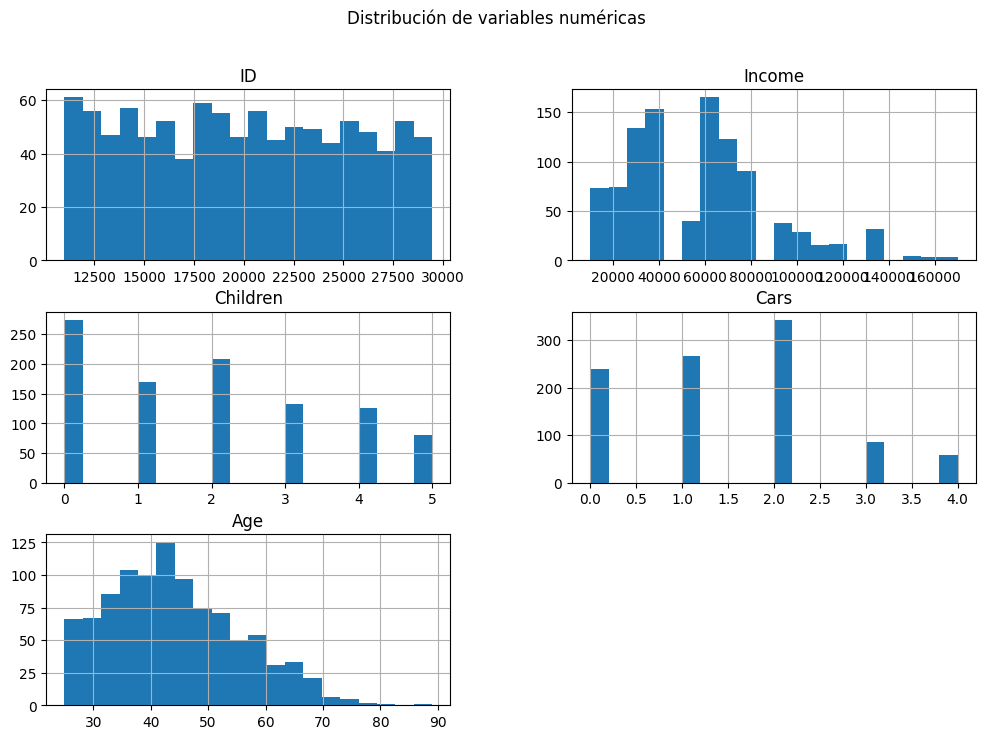

In [ ]:
num_cols = df.select_dtypes(include=[np.number]).columns
print("Columnas numéricas:", num_cols.tolist())

df[num_cols].hist(figsize=(12, 8), bins=20)
plt.suptitle("Distribución de variables numéricas")
plt.show()

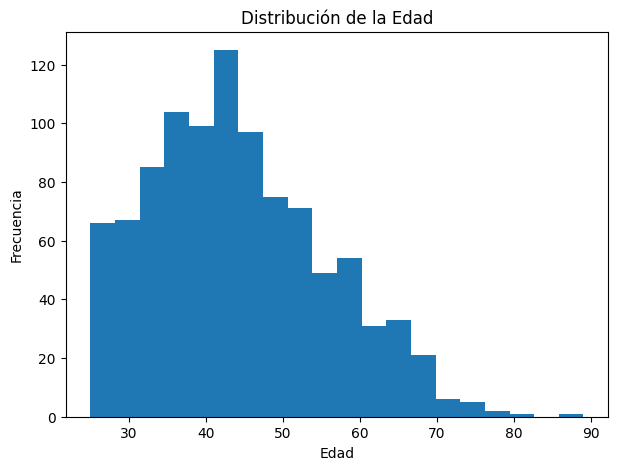

In [ ]:
plt.figure(figsize=(7,5))
plt.hist(df['Age'], bins=20)
plt.title("Distribución de la Edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

In [ ]:
#En este caso, como en el csv hay variables que tienen espacios, se reemplazara ese espacio por "_" para evitar problemas en el modelado
df.columns = df.columns.str.replace(" ", "_")

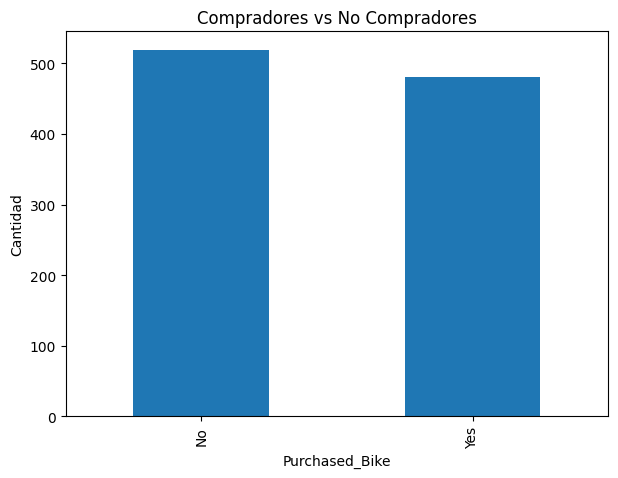

In [ ]:
plt.figure(figsize=(7,5))
df['Purchased_Bike'].value_counts().plot(kind='bar')
plt.title("Compradores vs No Compradores")
plt.xlabel("Purchased_Bike")
plt.ylabel("Cantidad")
plt.show()

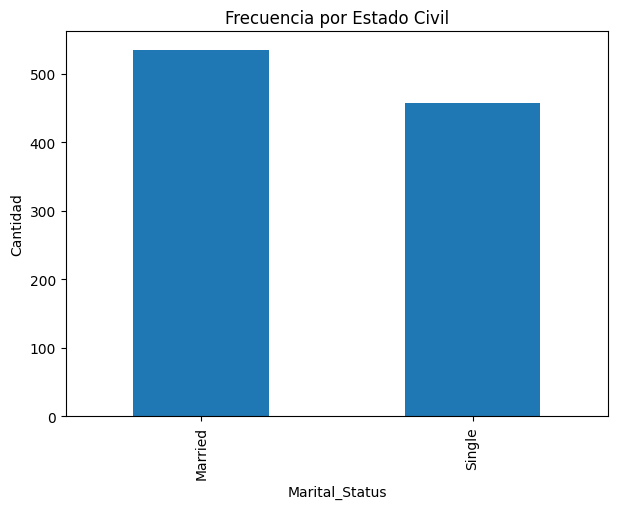

In [ ]:
plt.figure(figsize=(7,5))
df['Marital_Status'].value_counts().plot(kind='bar')
plt.title("Frecuencia por Estado Civil")
plt.xlabel("Marital_Status")
plt.ylabel("Cantidad")
plt.show()


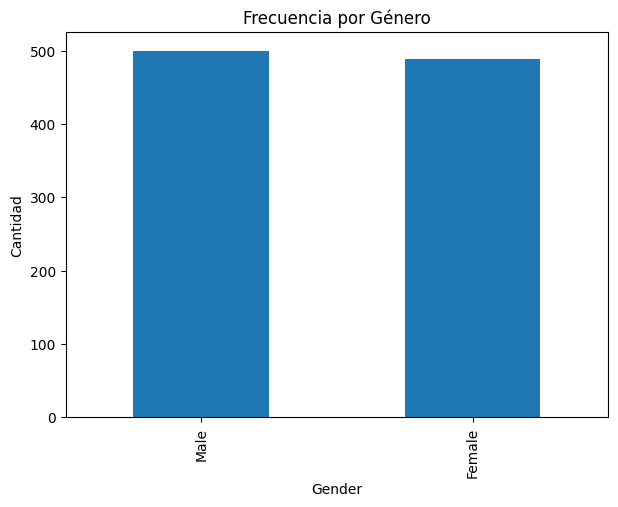

In [ ]:
plt.figure(figsize=(7,5))
df['Gender'].value_counts().plot(kind='bar')
plt.title("Frecuencia por Género")
plt.xlabel("Gender")
plt.ylabel("Cantidad")
plt.show()

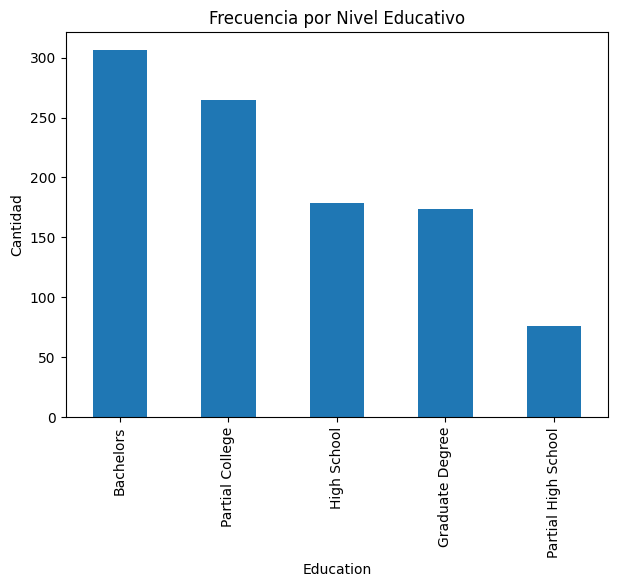

In [ ]:
plt.figure(figsize=(7,5))
df['Education'].value_counts().plot(kind='bar')
plt.title("Frecuencia por Nivel Educativo")
plt.xlabel("Education")
plt.ylabel("Cantidad")
plt.show()

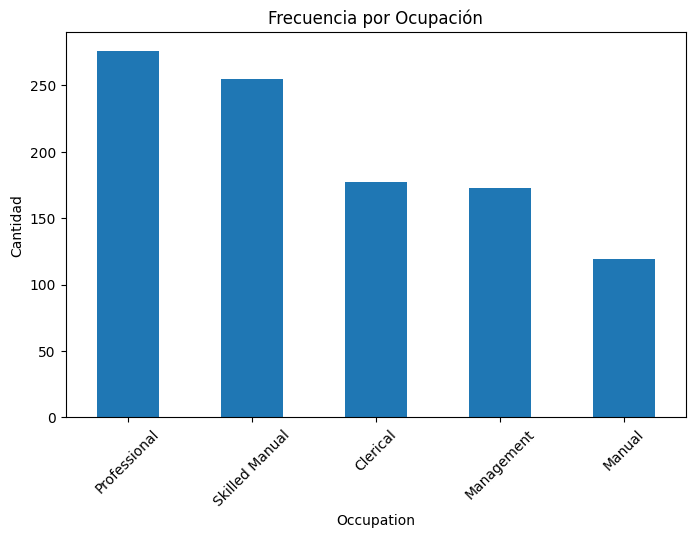

In [ ]:
plt.figure(figsize=(8,5))
df['Occupation'].value_counts().plot(kind='bar')
plt.title("Frecuencia por Ocupación")
plt.xlabel("Occupation")
plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.show()

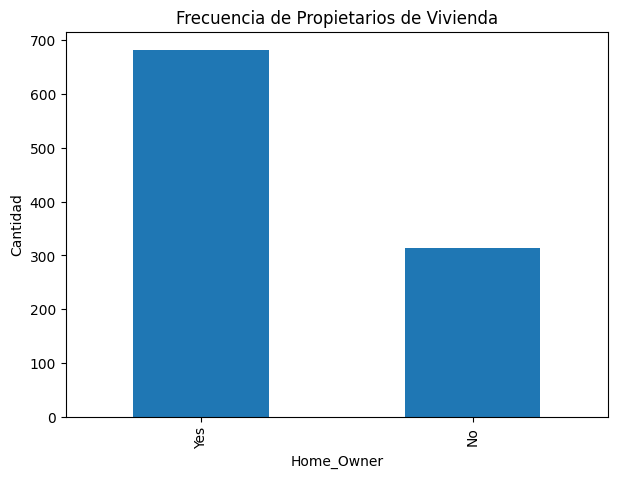

In [ ]:
plt.figure(figsize=(7,5))
df['Home_Owner'].value_counts().plot(kind='bar')
plt.title("Frecuencia de Propietarios de Vivienda")
plt.xlabel("Home_Owner")
plt.ylabel("Cantidad")
plt.show()

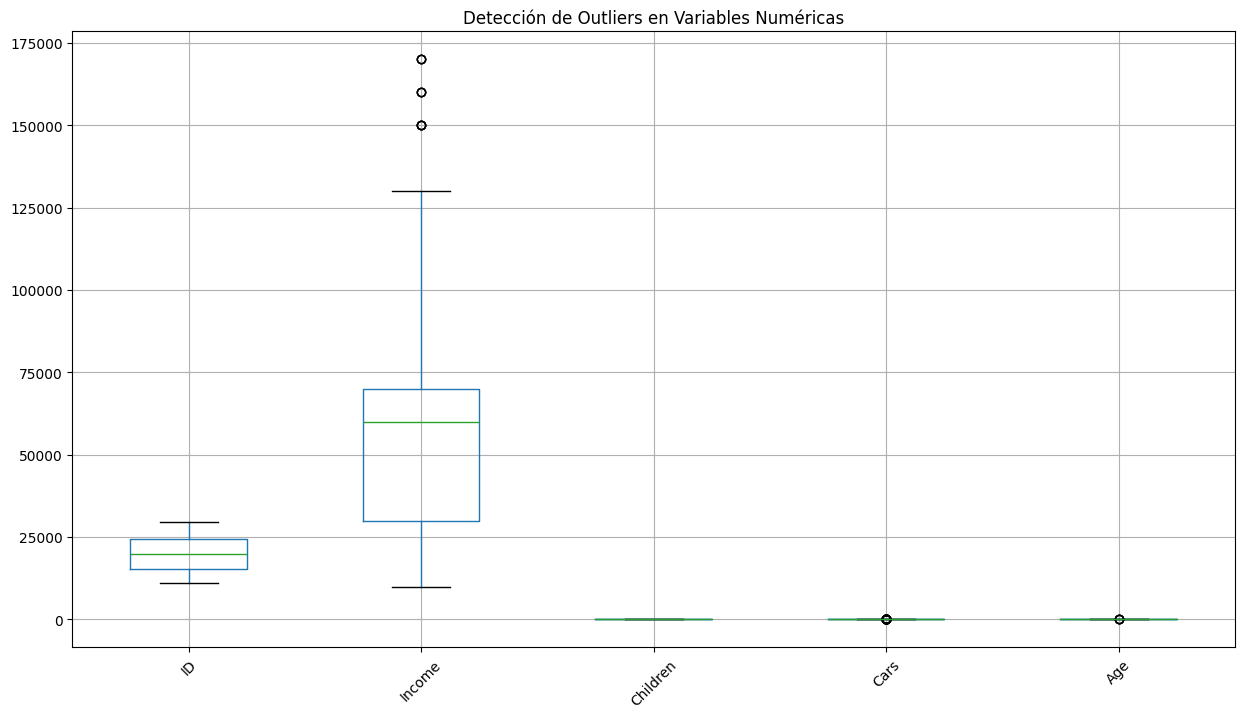

In [ ]:
plt.figure(figsize=(15, 8))
df[num_cols].boxplot()
plt.title("Detección de Outliers en Variables Numéricas")
plt.xticks(rotation=45)
plt.show()


PREPARACION DE LOS DATOS

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

In [ ]:
print(df.columns)

# Renombramos las columnas
df.columns = df.columns.str.replace(" ", "_")

print(df.columns)

# Modificacmos tambíen los valores de las columnas 'Occupation', 'Region' y 'Education'
cols = ['Occupation', 'Region', 'Education']
for col in cols:
    if col in df.columns and df[col].dtype == 'object':
        df[col] = df[col].str.replace(" ", "_")

Index(['ID', 'Marital_Status', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'Home_Owner', 'Cars', 'Commute_Distance', 'Region', 'Age',
       'Purchased_Bike'],
      dtype='object')
Index(['ID', 'Marital_Status', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'Home_Owner', 'Cars', 'Commute_Distance', 'Region', 'Age',
       'Purchased_Bike'],
      dtype='object')


In [ ]:
print("\nComprobando valores nulos...")
print(df.isnull().sum())


Comprobando valores nulos...
ID                   0
Marital_Status       7
Gender              11
Income               6
Children             8
Education            0
Occupation           0
Home_Owner           4
Cars                 9
Commute_Distance     0
Region               0
Age                  8
Purchased_Bike       0
dtype: int64


In [ ]:
# Para las variables cuantitativas, reemplazamos los valores nulos por la media
df.fillna(df.mean(numeric_only=True), inplace=True)

# Para las variables cualitativas, reemplazamos por la moda
vars_cual = ['Marital_Status', 'Gender', 'Home_Owner']
for var in vars_cual:
    df[var] = df[var].fillna(df[var].mode()[0])

In [ ]:
print("\nComprobando valores nulos...")
print(df.isnull().sum())


Comprobando valores nulos...
ID                  0
Marital_Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home_Owner          0
Cars                0
Commute_Distance    0
Region              0
Age                 0
Purchased_Bike      0
dtype: int64


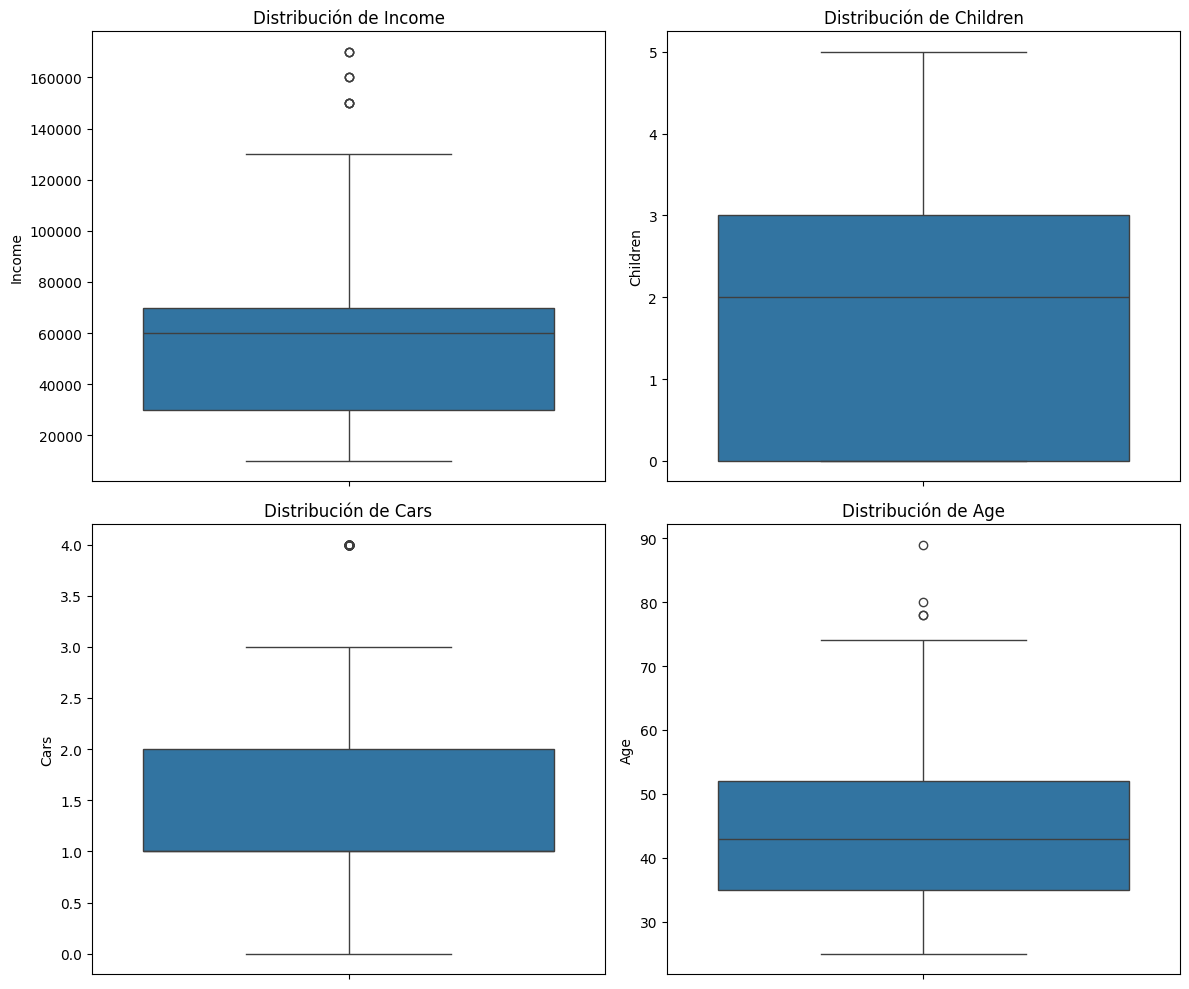

In [ ]:
vars_cuan = ['Income', 'Children', 'Cars', 'Age']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, var in enumerate(vars_cuan):
    sns.boxplot(data=df[var], ax=axes[i])
    axes[i].set_title('Distribución de ' + var)

plt.tight_layout()

plt.show()

In [ ]:
vars_cuan = ['Income', 'Children', 'Cars', 'Age']

lims = {}

outliers = {}

for var in vars_cuan:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    RIC = Q3 - Q1
    lim_inf = Q1 - 1.5 * RIC
    lim_sup = Q3 + 1.5 * RIC
    lims[var] = (lim_inf, lim_sup)

    # Identificar las tuplas (filas) que son outliers
    outliers[var] = df[(df[var] < lim_inf) | (df[var] > lim_sup)]

    # Imprimir las tuplas outliers de la variable actual
    print(f"Outliers para la variable '{var}':")
    print(outliers[var][[var]])
    print("-" * 50)

# Imprimir todos los límites calculados
print("\nLímites para detectar outliers (inferiores y superiores):")
for var, (lim_inf, lim_sup) in lims.items():
    print(f"{var}: Limite inferior: {lim_inf}, Limite superior: {lim_sup}")

Outliers para la variable 'Income':
       Income
6    160000.0
12   170000.0
43   170000.0
121  150000.0
178  160000.0
259  150000.0
321  160000.0
356  150000.0
829  170000.0
993  150000.0
--------------------------------------------------
Outliers para la variable 'Children':
Empty DataFrame
Columns: [Children]
Index: []
--------------------------------------------------
Outliers para la variable 'Cars':
     Cars
6     4.0
11    4.0
21    4.0
51    4.0
57    4.0
70    4.0
72    4.0
75    4.0
87    4.0
121   4.0
123   4.0
125   4.0
156   4.0
170   4.0
184   4.0
188   4.0
193   4.0
213   4.0
223   4.0
234   4.0
245   4.0
247   4.0
252   4.0
258   4.0
259   4.0
286   4.0
333   4.0
338   4.0
374   4.0
386   4.0
400   4.0
409   4.0
420   4.0
456   4.0
458   4.0
486   4.0
503   4.0
505   4.0
544   4.0
577   4.0
598   4.0
613   4.0
614   4.0
620   4.0
665   4.0
675   4.0
702   4.0
708   4.0
721   4.0
733   4.0
768   4.0
769   4.0
829   4.0
850   4.0
869   4.0
917   4.0
960   4.0
981   4.0


In [ ]:
# Aplicar Winsorización a cada variable numérica
for var in vars_cuan:
    df[var] = df[var].apply(lambda x: min(max(x, lims[var][0]), lims[var][1]))

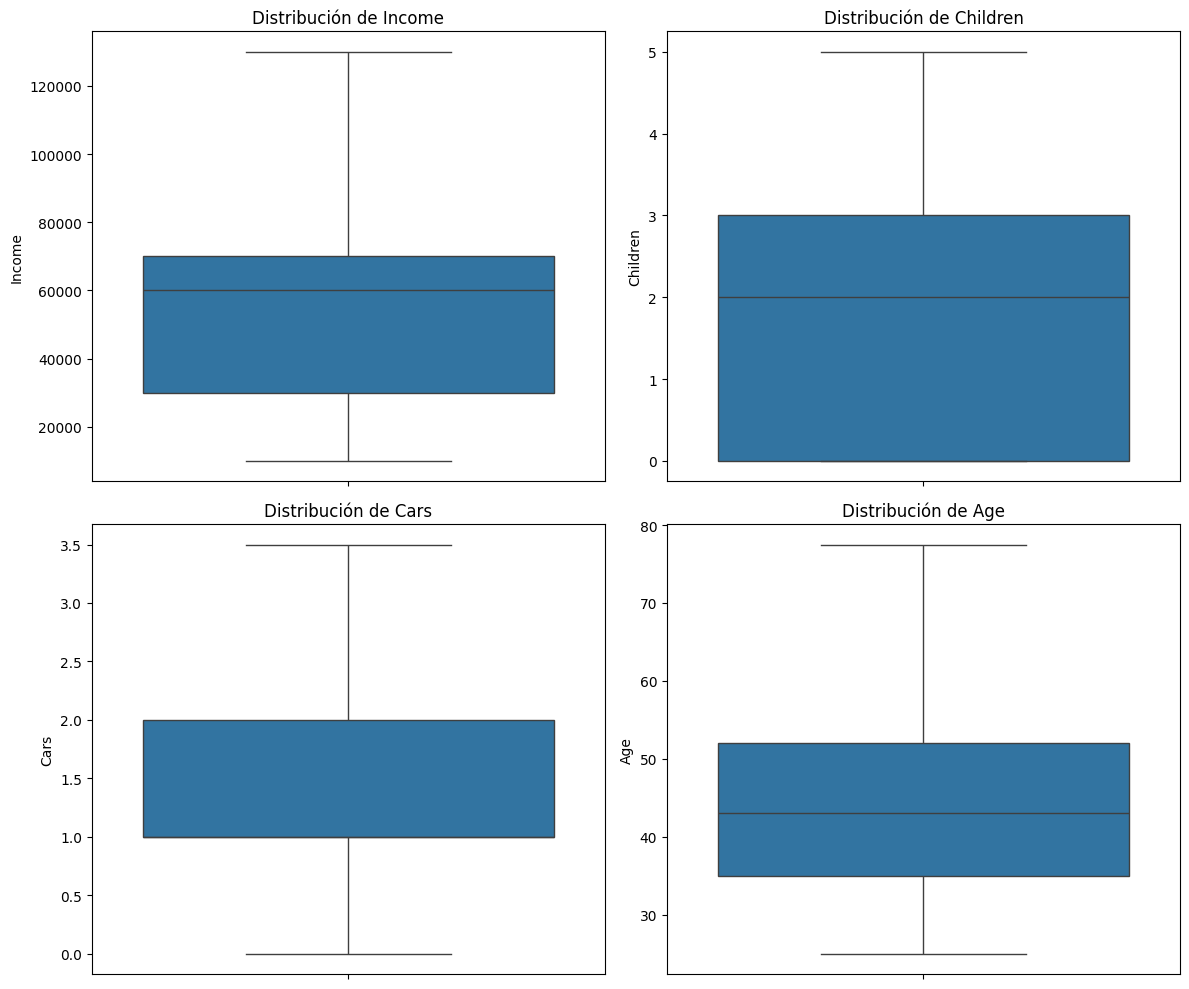

In [ ]:
vars_cuan = ['Income', 'Children', 'Cars', 'Age']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, var in enumerate(vars_cuan):
    sns.boxplot(data=df[var], ax=axes[i])
    axes[i].set_title('Distribución de ' + var)

plt.tight_layout()

plt.show()

In [ ]:
# Creamos una copia del df original para no modificarla
# df_original = df.copy()

Purchased_Bike
No     54682.080925
Yes    57375.479488
Name: Income, dtype: float64


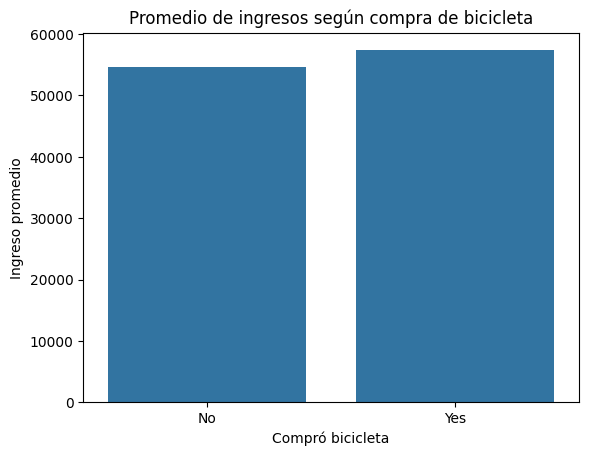

In [ ]:
# 1. ¿Cuánto es el promedio de ingresos de acuerdo con si la bicicleta fue comprada o no por el cliente?
promedio_ingresos_bike = df.groupby('Purchased_Bike')['Income'].mean()
print(promedio_ingresos_bike)

sns.barplot(x=promedio_ingresos_bike.index, y=promedio_ingresos_bike.values)
plt.title('Promedio de ingresos según compra de bicicleta')
plt.ylabel('Ingreso promedio')
plt.xlabel('Compró bicicleta')
plt.show()

Marital_Status
Married    58312.0
Single     53215.0
Name: Income, dtype: float64


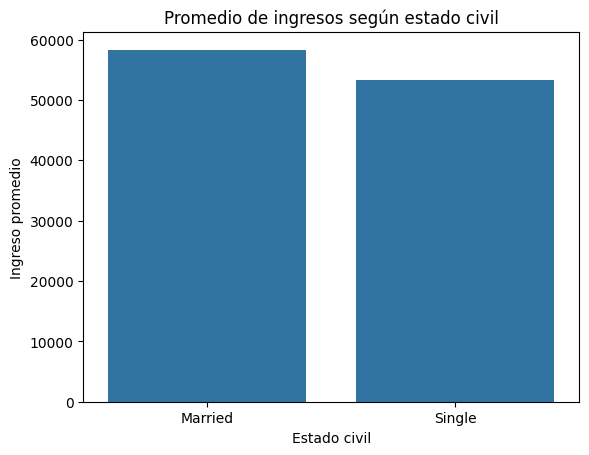

In [ ]:
# 2. ¿Cuánto es el promedio de ingresos según el estado civil del cliente?
promedio_ingresos_marital = df.groupby('Marital_Status')['Income'].mean().round(0)
print(promedio_ingresos_marital)

# Visualización
sns.barplot(x=promedio_ingresos_marital.index, y=promedio_ingresos_marital.values)
plt.title('Promedio de ingresos según estado civil')
plt.ylabel('Ingreso promedio')
plt.xlabel('Estado civil')
plt.show()

Education
Bachelors              2.537695
Graduate_Degree        2.741487
High_School            2.762367
Partial_College        2.567241
Partial_High_School    2.707124
Name: Children, dtype: float64


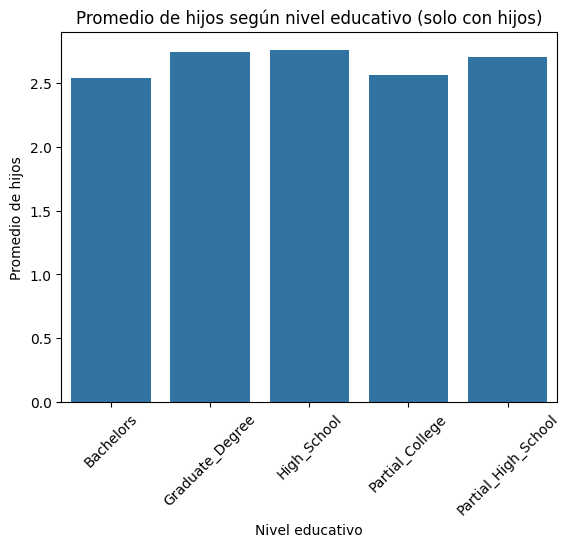

In [ ]:
# 3. Crear una nueva variable llamado Con_hijos, dónde Si: Children > 0, No: Children=0, para los clientes que si tienen hijos ¿Cuánto es el promedio de hijos según el nivel educativo del cliente?

# Crear nueva variable Con_hijos
df['Con_hijos'] = df['Children'].apply(lambda x: 'Si' if x > 0 else 'No')

# Promedio de hijos según nivel educativo
promedio_hijos_edu = df[df['Con_hijos'] == 'Si'].groupby('Education')['Children'].mean()
print(promedio_hijos_edu)

# Visualización
sns.barplot(x=promedio_hijos_edu.index, y=promedio_hijos_edu.values)
plt.title('Promedio de hijos según nivel educativo (solo con hijos)')
plt.ylabel('Promedio de hijos')
plt.xlabel('Nivel educativo')
plt.xticks(rotation=45)
plt.show()

Occupation
Clerical          1.493653
Management        2.270158
Manual            1.447152
Professional      2.053852
Skilled_Manual    1.717258
Name: Cars, dtype: float64


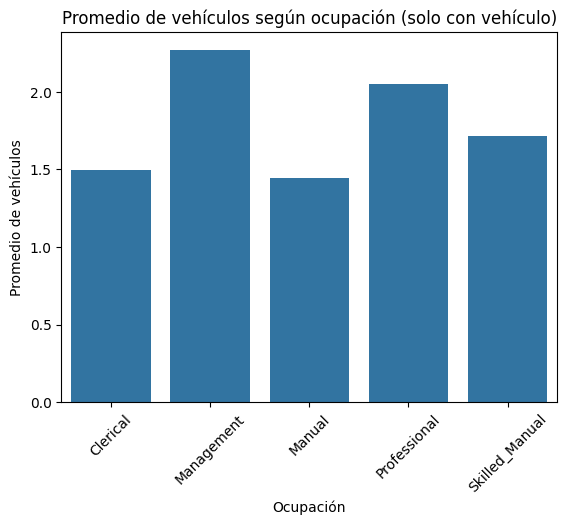

In [ ]:
# 4. Crear una nueva variable llamado Con_vehiculo, dónde Si: Cars>0, No: Cars=0, para los clientes que si tienen vehículo ¿Cuánto es el promedio de vehículos según la ocupación del cliente?

# Crear nueva variable Con_vehiculo
df['Con_vehiculo'] = df['Cars'].apply(lambda x: 'Si' if x > 0 else 'No')

# Promedio de vehículos según ocupación
promedio_cars_ocup = df[df['Con_vehiculo'] == 'Si'].groupby('Occupation')['Cars'].mean()
print(promedio_cars_ocup)

# Visualización
sns.barplot(x=promedio_cars_ocup.index, y=promedio_cars_ocup.values)
plt.title('Promedio de vehículos según ocupación (solo con vehículo)')
plt.ylabel('Promedio de vehículos')
plt.xlabel('Ocupación')
plt.xticks(rotation=45)
plt.show()

Home_Owner
No     42.314850
Yes    45.013978
Name: Age, dtype: float64


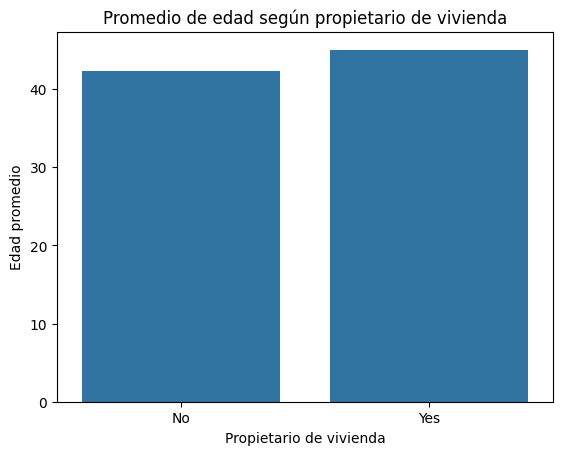

In [ ]:
# 5. ¿Cuánto es el promedio de edad de acuerdo con si el cliente es o no propietario de una vivienda?
# Promedio de edad según propietario de vivienda
promedio_edad_home = df.groupby('Home_Owner')['Age'].mean()
print(promedio_edad_home)

# Visualización
sns.barplot(x=promedio_edad_home.index, y=promedio_edad_home.values)
plt.title('Promedio de edad según propietario de vivienda')
plt.ylabel('Edad promedio')
plt.xlabel('Propietario de vivienda')
plt.show()

In [ ]:
# Restauramos el df original
# df = df_original.copy()

In [ ]:
le = LabelEncoder()

# Aplicar Label Encoding a variables con solo 2 tipos de valores
cat_cols_le = ['Gender', 'Home_Owner', 'Purchased_Bike', 'Con_hijos', 'Con_vehiculo', 'Marital_Status']
for col in cat_cols_le:
    if col in df.columns and df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

# Aplicar One-Hot encoding a variables con más de 2 tipos de valores
cat_cols_ohe = ['Education', 'Occupation', 'Region']
cols_to_ohe = [col for col in cat_cols_ohe if col in df.columns and df[col].dtype == 'object']
if cols_to_ohe:
    df = pd.get_dummies(df, columns=cols_to_ohe, drop_first=True)

# Aplicar Label Encoding a Commute Distance
if 'Commute_Distance' in df.columns and df['Commute_Distance'].dtype == 'object':
    df['Commute_Distance'] = le.fit_transform(df['Commute_Distance'])

# Ver los resultados
print(df.head())

      ID  Marital_Status  Gender   Income  Children  Home_Owner  Cars  \
0  12496               0       0  40000.0       1.0           1   0.0   
1  24107               0       1  30000.0       3.0           1   1.0   
2  14177               0       1  80000.0       5.0           0   2.0   
3  24381               1       1  70000.0       0.0           1   1.0   
4  25597               1       1  30000.0       0.0           0   0.0   

   Commute_Distance   Age  Purchased_Bike  ...  Education_Graduate_Degree  \
0                 0  42.0               0  ...                      False   
1                 0  43.0               0  ...                      False   
2                 3  60.0               0  ...                      False   
3                 4  41.0               1  ...                      False   
4                 0  36.0               1  ...                      False   

   Education_High_School  Education_Partial_College  \
0                  False                   

In [ ]:
# Normalización de las variables
scaler = MinMaxScaler()

df[vars_cuan] = scaler.fit_transform(df[vars_cuan])

# Verifica el resultado
print(df[vars_cuan].head())

     Income  Children      Cars       Age
0  0.250000       0.2  0.000000  0.323810
1  0.166667       0.6  0.285714  0.342857
2  0.583333       1.0  0.571429  0.666667
3  0.500000       0.0  0.285714  0.304762
4  0.166667       0.0  0.000000  0.209524


MODELADO

Tamaños: X_train: (800, 20) X_test: (200, 20)

--- LogisticRegression ---
Accuracy: 0.6100  Precision: 0.6047  Recall: 0.5417  F1: 0.5714  ROC-AUC: 0.6958
Classification report:
               precision    recall  f1-score   support

           0       0.61      0.67      0.64       104
           1       0.60      0.54      0.57        96

    accuracy                           0.61       200
   macro avg       0.61      0.61      0.61       200
weighted avg       0.61      0.61      0.61       200



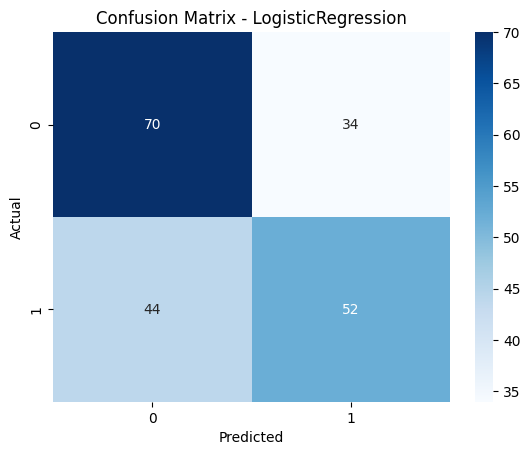

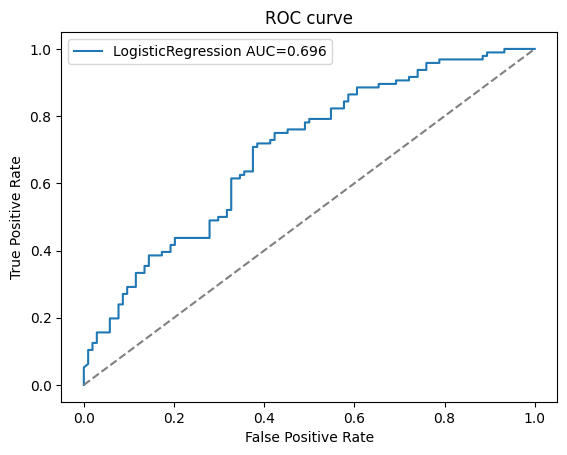


--- DecisionTree ---
Accuracy: 0.6300  Precision: 0.6019  Recall: 0.6771  F1: 0.6373  ROC-AUC: 0.6672
Classification report:
               precision    recall  f1-score   support

           0       0.66      0.59      0.62       104
           1       0.60      0.68      0.64        96

    accuracy                           0.63       200
   macro avg       0.63      0.63      0.63       200
weighted avg       0.63      0.63      0.63       200



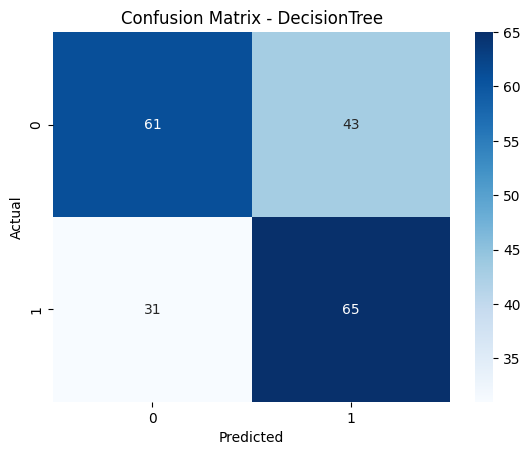

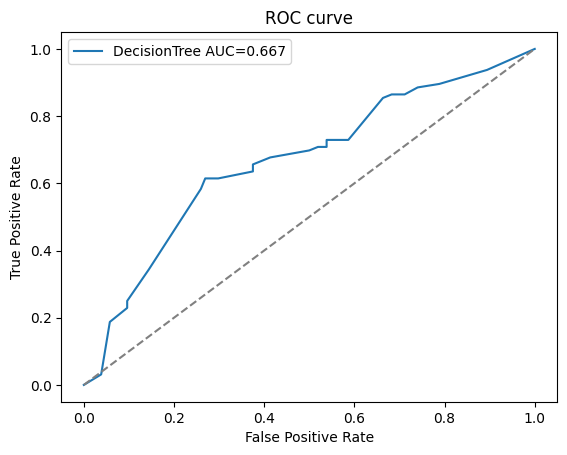


--- MLPClassifier ---
Accuracy: 0.6550  Precision: 0.6627  Recall: 0.5729  F1: 0.6145  ROC-AUC: 0.6866
Classification report:
               precision    recall  f1-score   support

           0       0.65      0.73      0.69       104
           1       0.66      0.57      0.61        96

    accuracy                           0.66       200
   macro avg       0.66      0.65      0.65       200
weighted avg       0.66      0.66      0.65       200



/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


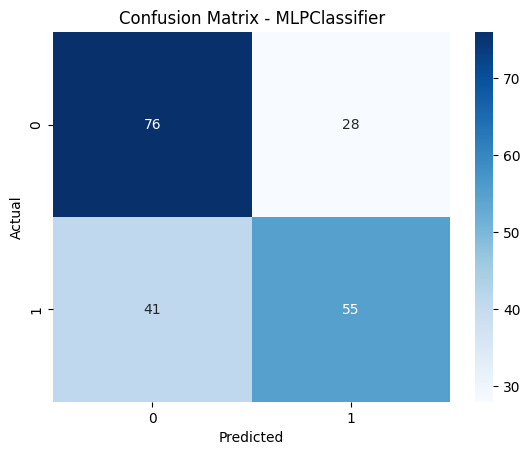

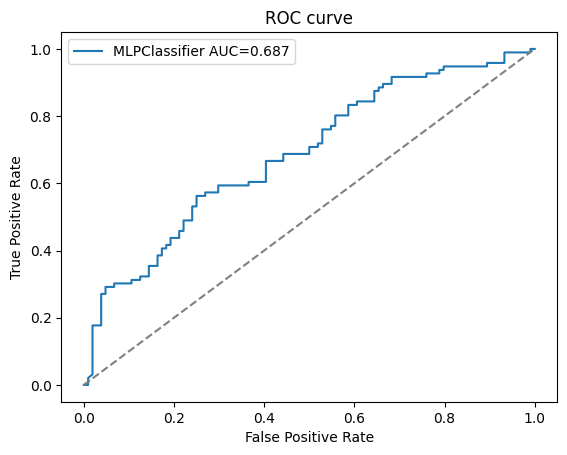


Cross-validation (accuracy) - LogisticRegression: 0.6275
Cross-validation (accuracy) - DecisionTree: 0.6287499999999999


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Cross-validation (accuracy) - MLP: 0.6849999999999999

Feature importances (DecisionTree):


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


,0
Age,0.396590
Commute_Distance,0.135921
Income,0.119987
Cars,0.105658
Region_Pacific,0.078946
Children,0.060455
Marital_Status,0.032723
Home_Owner,0.032258
Gender,0.028840
Education_Partial_High_School,0.008621


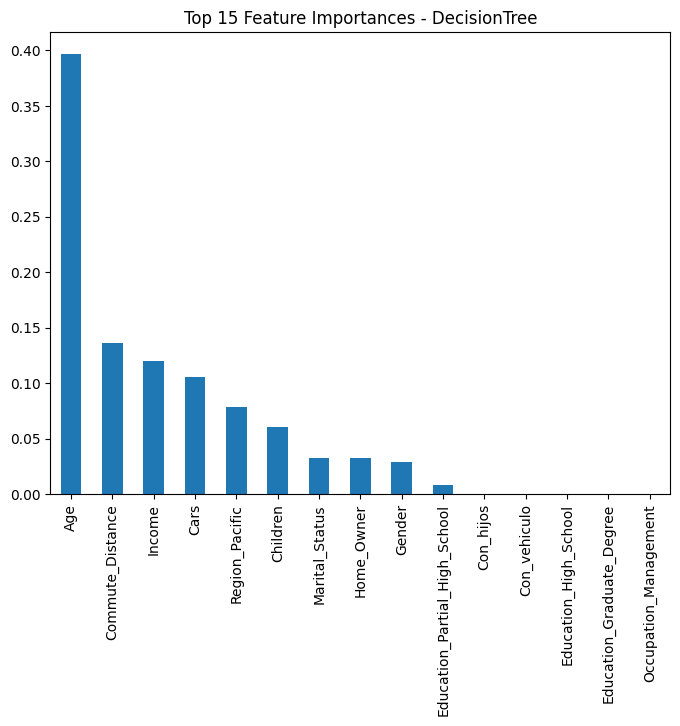


Top coeficientes absolutos (LogisticRegression):


,0
Cars,-0.606696
Region_Pacific,0.587497
Income,0.459661
Education_Partial_High_School,-0.377966
Marital_Status,0.330779
Occupation_Professional,0.327757
Education_High_School,0.288321
Occupation_Management,-0.278079
Children,-0.265084
Con_hijos,0.217223



Mejor modelo según AUC: LogisticRegression (AUC=0.6958)
Top50 prospects guardado como top50_prospects.csv
Mejor modelo guardado en best_model.pkl


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, roc_curve, confusion_matrix, classification_report)
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Preparar X e y
# Si se tiene columna ID, se elimuba
cols_drop = [c for c in ['ID'] if c in df.columns]
target_col = 'Purchased_Bike'
if target_col not in df.columns:
    raise ValueError("No se encontró la columna objetivo 'Purchased_Bike'")

X = df.drop(columns=cols_drop + [target_col])
y = df[target_col]

# Asegurar que y sea 0/1
if y.dtype == 'object':
    y = y.map({'No':0, 'Yes':1, 'N':0, 'Y':1}).fillna(y)  # intentar mapear si vinieron como Yes/No
y = y.astype(int)

# 2) Train/Test split (estratificado)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print("Tamaños: X_train:", X_train.shape, "X_test:", X_test.shape)

# 3) Normalizar/estandarizar si aún no está
from sklearn.preprocessing import StandardScaler
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()

scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train[num_cols])
X_test_num = scaler.transform(X_test[num_cols])

# Reemplazar columnas numéricas en X_train/X_test con las escaladas:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[num_cols] = X_train_num
X_test_scaled[num_cols] = X_test_num

# 4) Función auxiliar para entrenamiento y evaluación
def eval_model(model, X_tr, y_tr, X_te, y_te, model_name="model"):
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_te)
    y_proba = model.predict_proba(X_te)[:,1] if hasattr(model, "predict_proba") else model.decision_function(X_te)
    acc = accuracy_score(y_te, y_pred)
    prec = precision_score(y_te, y_pred)
    rec = recall_score(y_te, y_pred)
    f1 = f1_score(y_te, y_pred)
    auc = roc_auc_score(y_te, y_proba)
    print(f"\n--- {model_name} ---")
    print(f"Accuracy: {acc:.4f}  Precision: {prec:.4f}  Recall: {rec:.4f}  F1: {f1:.4f}  ROC-AUC: {auc:.4f}")
    print("Classification report:\n", classification_report(y_te, y_pred))
    # Confusion matrix
    cm = confusion_matrix(y_te, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    # ROC
    fpr, tpr, _ = roc_curve(y_te, y_proba)
    plt.plot(fpr, tpr, label=f"{model_name} AUC={auc:.3f}")
    plt.plot([0,1], [0,1], '--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend()
    plt.show()
    return {'model': model, 'acc': acc, 'precision': prec, 'recall': rec, 'f1': f1, 'auc': auc}

# 5) Modelos: LogisticRegression (inductivo), DecisionTree (divide & conquer), MLP (bioinspirado)
# Logistic Regression
log_clf = LogisticRegression(max_iter=1000, random_state=42)
res_log = eval_model(log_clf, X_train_scaled, y_train, X_test_scaled, y_test, model_name="LogisticRegression")

# Decision Tree
tree_clf = DecisionTreeClassifier(random_state=42, max_depth=6)  # max_depth por defecto para controlar overfit
res_tree = eval_model(tree_clf, X_train_scaled, y_train, X_test_scaled, y_test, model_name="DecisionTree")

# MLP (Red Neuronal)
mlp_clf = MLPClassifier(hidden_layer_sizes=(50,30), max_iter=500, random_state=42)
res_mlp = eval_model(mlp_clf, X_train_scaled, y_train, X_test_scaled, y_test, model_name="MLPClassifier")

# 6) Cross-validation y GridSearch para ajustar hiperparámetros del mejor candidato
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
print("\nCross-validation (accuracy) - LogisticRegression:", cross_val_score(log_clf, X_train_scaled, y_train, cv=skf, scoring='accuracy').mean())
print("Cross-validation (accuracy) - DecisionTree:", cross_val_score(tree_clf, X_train_scaled, y_train, cv=skf, scoring='accuracy').mean())
print("Cross-validation (accuracy) - MLP:", cross_val_score(mlp_clf, X_train_scaled, y_train, cv=skf, scoring='accuracy').mean())

# 7) Importancia de variables
# Para árbol:
if hasattr(tree_clf, "feature_importances_"):
    fi = pd.Series(tree_clf.feature_importances_, index=X_train_scaled.columns).sort_values(ascending=False)
    print("\nFeature importances (DecisionTree):")
    display(fi.head(20))
    plt.figure(figsize=(8,6))
    fi.head(15).plot(kind='bar')
    plt.title('Top 15 Feature Importances - DecisionTree')
    plt.show()

# Para logística: coeficientes
if hasattr(log_clf, "coef_"):
    coefs = pd.Series(log_clf.coef_[0], index=X_train_scaled.columns).sort_values(key=abs, ascending=False)
    print("\nTop coeficientes absolutos (LogisticRegression):")
    display(coefs.head(20))

# 8) Crear scoring y exportar resultados
# Se usará el modelo por AUC (compara res_log/res_tree/res_mlp)
results = [res_log, res_tree, res_mlp]
best = max(results, key=lambda r: r['auc'])
print(f"\nMejor modelo según AUC: {best['model'].__class__.__name__} (AUC={best['auc']:.4f})")

# Generar scoring (probabilidad) sobre todo el dataset y guardar top prospects
best_model = best['model']
# Asegurarse de usar el mismo escalador para todo X
X_all = df.drop(columns=cols_drop + [target_col])
X_all[num_cols] = scaler.transform(X_all[num_cols])
if hasattr(best_model, "predict_proba"):
    df['score_buy'] = best_model.predict_proba(X_all)[:,1]
else:
    df['score_buy'] = best_model.decision_function(X_all)

# Exportar top 50 clientes por score
top50 = df.sort_values('score_buy', ascending=False).head(50)
top50[['ID', 'score_buy']].to_csv('top50_prospects.csv', index=False)
print("Top50 prospects guardado como top50_prospects.csv")

# Guardar el mejor modelo con joblib
import joblib
joblib.dump(best_model, 'best_model.pkl')
print("Mejor modelo guardado en best_model.pkl")